In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns
# github_link: https://github.com/Jad-Atout/ML-Project/blob/main/README.md

In [2]:
df = pd.read_excel("TG_T_CashValues_Rel.xlsx")

In [3]:
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


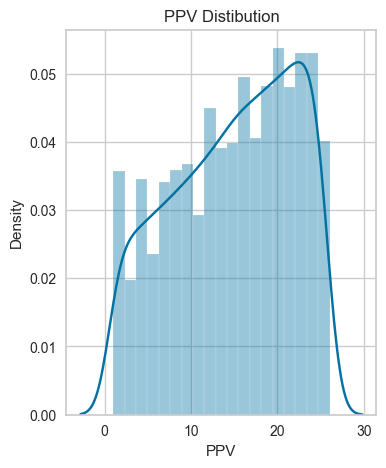

In [4]:

plt.figure(figsize=(4, 5))
sns.distplot(df['PPV'])

plt.title('PPV Distibution')
plt.show()

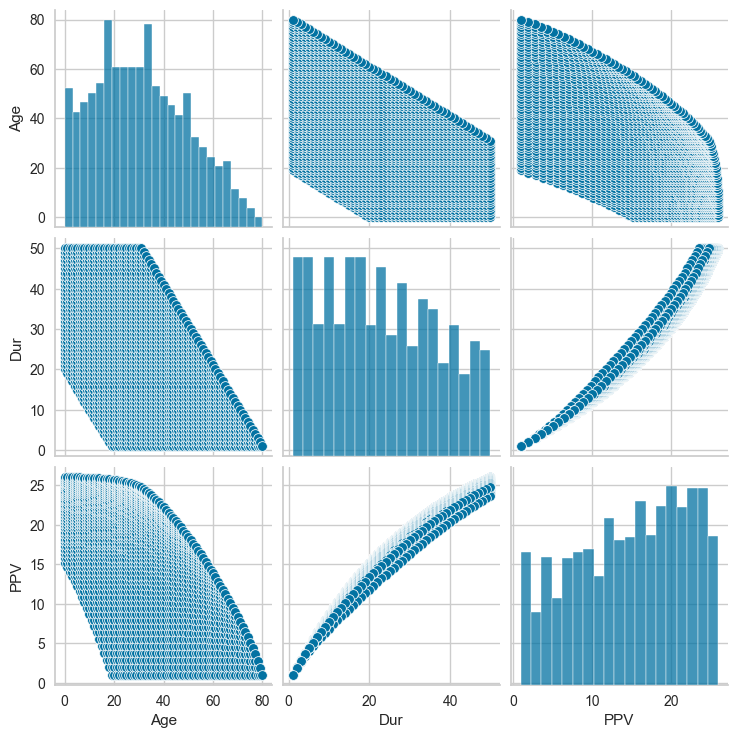

In [5]:
sns.pairplot(df)
plt.show()

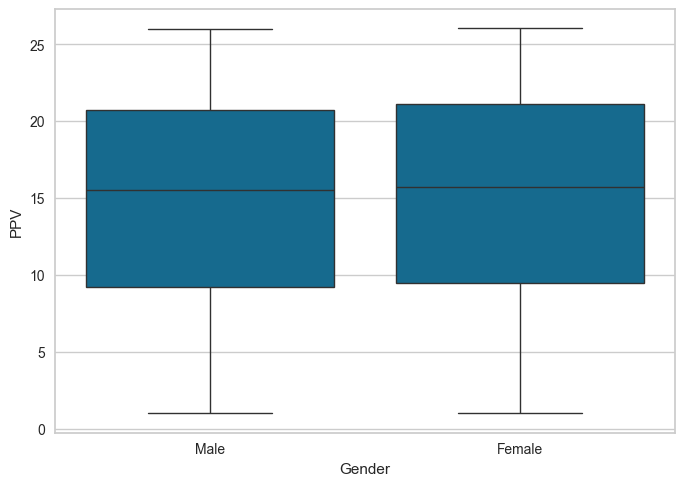

In [6]:
sns.boxplot(data=df, x='Gender', y='PPV');

In [7]:
regression_setup = setup(df, target='PPV', session_id=123,
                         categorical_features=['Gender'],
                         numeric_features=['Age', 'Dur'],
                         normalize=True)


,Description,Value
0,Session id,123
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(3688, 4)"
6,Transformed test set shape,"(1582, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


In [ ]:
best_model = compare_models()
best_model

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:25:33
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:25:33
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Orthogonal Matching Pursuit


In [9]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [10]:
predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.0067,0.0003,0.0163,1.0000,0.0012,0.0005


In [11]:
final_model = finalize_model(best_model)

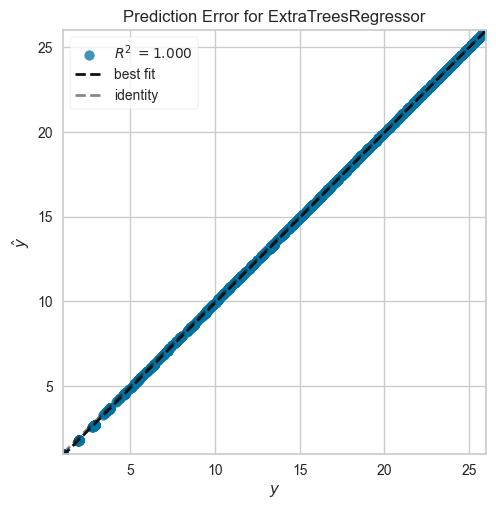

In [12]:
plot_model(final_model, plot = 'error')

In [13]:
save_model(final_model,'final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Dur'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64}]))),


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = predictions['prediction_label']

In [15]:
y_true = df['PPV'].loc[y_pred.index.tolist()] 

In [16]:
rmse = mean_squared_error(y_true, y_pred,squared=False)
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.01633967406140317
MAE: 0.0067407144813240675


In [17]:
model =load_model('final_model')
print(model)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\HP\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Dur'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                 